<img src="https://fsharp.org/img/logo/fsharp256.png" style="float:right; margin:auto" width="200px">

# Fable Python

|> F# ♥️ Python

Dag Brattli  
Principal Software Engineer  
Cognite, https://cognite.com  

<img src="https://fable.io/static/img/fable_logo.png" style="float:left; margin:auto" width="200px">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1024px-Python-logo-notext.svg.png" style="float:right; margin:auto" width="200px">

# Who am I?

- A Python programmer in love with F#
- Programming Python since 1995
    - [RxPY](https://github.com/ReactiveX/RxPY), Reactive Extensions for Python
    - [Expression](https://github.com/cognitedata/expression), Pragmatic functional programming for Python inspired by F#
- Programming F# since 2018
    - [Oryx](https://github.com/cognitedata/oryx), Composable middleware for building web request handlers in F# 
    - [AsyncRx](https://github.com/dbrattli/asyncrx), for F# and Fable
    - [Fable.Reaction](https://github.com/dbrattli/fable.reaction), AsyncRx for Elmish
- Microsoft Alumni (FAST, Outlook, Office Division)
- Work for Cognite, https://cognite.com

# Why?

> ... on a quest to bridge the worlds of F# and Python 🌉

- Python and F# look similar in many ways (no braces or semicolons)
- F# have superior type system and type inference, combined with pipelining, pattern matching, computational expressions
- I didn’t select this project, the project selected me ✨ It’s a fun weekend project! 😊 

- Can we make F# a better Python? Could we reduce the friction of using F#?

# Python 

October 2021: Python ends C and Java's 20-year reign atop the TIOBE index

<img src="https://www.techrepublic.com/a/hub/i/r/2021/10/11/9529e5f5-503a-4327-8f57-41bb631e880e/resize/770x/9be188fdd9d426b0afdc317849f07c54/tiobe-oct21.jpg" style="float:right; margin:auto" width="100%">

# Python (the good parts)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1024px-Python-logo-notext.svg.png" style="float:right; margin:auto" width="100px">

- Python is the **top 1** popular language in the world! 
- Python is **easy to use**! The low friction makes Python a **popular choice** for **new developers**
- Python is also the **de-facto** language for **data science** 
- SciPy stack consisting of libraries such as Pandas, NumPy, SciPy, Matplotlib, and Jupyter
- Available on **any platform** (pre-installed)


# Python (the not so good parts)

- ~10 times **slower** than most compiled languages. But in most cases it doesn't really matter
- Dynamic typing makes it **hard to detect bugs, and refactor** code
- Optional type hints looks ugly and messes up the language
- Static **type checkers** like mypy and pyright **break your code** base with every new release
- Eventually you spend all your time **fixing typing** issues 🤯

# First Try: Expression

- Pragmatic functional programming for Python inspired by F#
- Python Library that gives you (a few) F# powers
- Option, Result, List, Map and Seq modules with type hints
- Map implementation ported from F#
- Pipe function, MailboxProcessor, ...

```py
xs = Seq.of(1, 2, 3)
ys = pipe(xs,
    seq.map(lambda x: x * 100),
    seq.filter(lambda x: x > 100),
    seq.fold(lambda s, x: s + x, 0),
)
```

https://github.com/cognitedata/Expression (138 stars)

# Second Try: Fable Python

- Fable F# to Python transpiler (compiler)
- Tries to follow [PEP-8](https://www.python.org/dev/peps/pep-0008/) style guide i.e `snake_case` method names
- Fable.Library makes parts of .NET available
- Fable.Python makes parts of Python available
- Python package and module imports (absolute for Exe, relative for Library)
- Currently produces Python code without type hints

In [2]:
let a = Some 10
match a with
| Some value ->    
    printfn $"This is {value}"
| None -> ()

This is 10


In [3]:
%python

from fable_modules.fable_library.string import to_console, interpolate

a = 10

if a is None:
    pass

else:
    to_console(interpolate("This is %P()", [a]))

# Challenges

Where to start? Translate Babel AST or Fable AST?
- **Fable AST**: gives more control. Know the intent of the code
- **Arrow functions**: aka multi-line lambdas
- **Non-local**: variable scoping. Python have no `let` or `const`
- **Tail-call**: TC optimization. Closures within loops
- **Numbers**: integers vs floats – numerics inherited from Fable JS
- **Imports**: Python packages and modules, relative and absolute imports
- **Async**: F# Async or Python awaitables, coroutines Futures and Tasks.

 # Type Annotations
 
Python types and F# types are not fully compatible (yet). Ref:
https://github.com/microsoft/pyright/issues/1264

F#:

```fs
let length(xs: 'T list) =
    42
```

Python:

```py
def length(xs: List[_T]) -> int:
    return 42
```
Gives error in [Pyright](https://github.com/microsoft/pyright) type checker (used by Pylance):

```
TypeVar "_T" appears only once in generic function signature Pylance(reportInvalidTypeVarUse) (type variable) _T
```

# Data Type Mapping

| F#         |   Python   | Comment                                       |
|------------|:----------:|-----------------------------------------------|
| List       |  List.fs   | F# immutable list                             |
| Map        |   Map.fs   | F# immutable map                              |
| Array      |   `list`   | TODO: Python has arrays for numeric types     |
| Record     |  types.py  | Custom Record class. Replace with `dict`?     |
| An. Record |   `dict`   |                                               |
| Option     |   Erased   | F# `None` will be translated to Python `None` |
| dict       |   `dict`   | Also used for Dictionary                      |
| tuple      |  `tuple`   |                                               |
| Decimal    | `decimal`  |                                               |
| DateTime   | `datetime` |                                               |
| string     |  `string`  |                                               |
| char       |  `string`  |                                               |


 # Interfaces and Protocols
 
- .NET uses Interfaces. Python uses protocols (duck typing) or structural sub-typing
- Trying to translate .NET interfaces to Python magic methods
- We want the Python code to look like Python (not .NET)
 
| .NET          |       Python       |
|:--------------|:------------------:|
| `IEquatable`  |      `__eq__`      |
| `IEnumerator` |     `__next__`     |
| `IEnumerable` |     `__iter__`     |
| `IComparable` | `__lt__`+ `__eq__` |
| `ToString`    |     `__str__`      |

Calls to `x.ToString` will be translated to `str(x)`.

# Numerics

| F#               | .NET    | Python |
|:-----------------|:--------|--------|
| bool             | Boolean | bool   |
| int              | Int32   | int    |
| byte             | Byte    | int    |
| sbyte            | SByte   | int    |
| int16            | Int16   | int    |
| int64            | Int64   | int    |
| uint16           | Uint16  | int    |
| uint32           | Uint32  | int    |
| uint64           | Uint64  | int    |
| float / double   | Double  | float  |
| float32 / single | Single  | float  |

Python integers are unbounded. Max size limited by available memory. 

# Status: 661 Passing Unit-tests

Tests first run as F# using **xUnit**, then **pytest** after compiling to Python:

```py
test_arithmetic.py .......................
test_array.py ............................................
test_async.py .............
test_comparison.py .............................
test_custom_operators.py ..........
test_date_time.py ........
test_enum.py ......................
test_enumerable.py ...
test_fn.py ..
test_list.py ......................................................................................
test_loops.py ...
test_map.py .......................................
test_math.py .
test_option.py ................................
test_py_interop.py ....
test_record_type.py ...........
test_reflection.py .............
test_result.py ......
test_seq.py ...............................................................................................
test_seq_expression.py .............
test_set.py ...............................................
test_string.py ......................................................................................................................
test_sudoku.py .
test_tail_call.py ................
test_tuple_type.py ........
test_union_type.py ..............

========= 661 passed in 18.16s =========
Build finished successfully
```

# Use Case: Jupyter Notebook

<img src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" style="float:right; margin:auto" width="200px">

- What you are seeing right now!
- Run on `IPythonKernel` and can do anything that Python can do e.g Widgets
- **Challenge**: Jupyter submit cells. Fable compiles projects and files / modules
- **TODO:** start F# compilation from within the kernel
- **TODO:** completion using [FsAutoComplete](https://github.com/fsharp/FsAutoComplete)
- **TODO:** NuGet handling using `#r "nuget:..."`

https://github.com/dbrattli/Fable.Jupyter

In [5]:
// Example to create some nested functions
let add(a, b, cont) =
    cont(a + b)

let square(x, cont) =
    cont(x * x)

let sqrt(x, cont) =
    cont(sqrt(x))

let pythagoras(a, b, cont) =
    let mutable state = 0
    square(a, (fun aa ->
        square(b, (fun bb ->
            add(aa, bb, (fun aabb ->
                sqrt(aabb, (fun result ->
                    printfn "result: %A" result
                    state <- 42
                    cont(result)
                ))
            ))
        ))
    ))

pythagoras(2.0, 3.5, printfn "The result is %f")

result: 4.031128874149275
The result is 4.031129


In [6]:
%python

import math
from fable_modules.fable_library.string import to_console, printf

a = 10


def add(a_1, b, cont):
    return cont(a_1 + b)


def square(x, cont):
    return cont(x * x)


def sqrt(x, cont):
    return cont(math.sqrt(x))


def pythagoras(a_1, b, cont):
    state = 0

    def arrow_12(aa, a_1=a_1, b=b, cont=cont):
        def arrow_11(bb):
            def arrow_10(aabb):
                def arrow_9(result):
                    nonlocal state
                    to_console(printf("result: %A"))(result)
                    state = 42
                    return cont(result)

                return sqrt(aabb, arrow_9)

            return add(aa, bb, arrow_10)

        return square(b, arrow_11)

    return square(a_1, arrow_12)


def arrow_14(_unit=None):
    clo1 = to_console(printf("The result is %f"))

    def arrow_13(arg10):
        clo1(arg10)

    return arrow_13


pythagoras(2, 3.5, arrow_14())

In [6]:
%fsharp

module Fable.Jupyter
let a = Some 10
let add(a, b, cont) =
    cont(a + b)
let square(x, cont) =
    cont(x * x)
let sqrt(x, cont) =
    cont(sqrt(x))
let pythagoras(a, b, cont) =
    let mutable state = 0
    square(a, (fun aa ->
        square(b, (fun bb ->
            add(aa, bb, (fun aabb ->
                sqrt(aabb, (fun result ->
                    printfn "result: %A" result
                    state <- 42
                    cont(result)
                ))
            ))
        ))
    ))
// Example to create some nested functions
pythagoras(2.0, 3.5, printfn "The result is %f")

## Shared Kernel

- F# and Python running together in the same Jupyter kernel
- Same kernel, same variables

In [6]:
%%python
p = 20
print("Python: ", p)

Python:  20


In [7]:
open Fable.Core
let [<Global>] p : int = nativeOnly

printfn $"From Python: {p}"

From Python: 20


In [8]:
// F#
let q = 42

In [9]:
%%python
print(q + 10)

52


# Widgets

In [11]:
open Fable.Python.IPyWidgets

let handler(x: string) =
    $"Got: {x}"

widgets.interact(handler, x="test") |> ignore

interactive(children=(Text(value='test', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.<lambda>(x)>

In [12]:
open Fable.Python.IPyWidgets

widgets.FloatSlider()

FloatSlider(value=0.0)

# Data Science

Plot a time-series from Cognite Data Fusion (CDF)

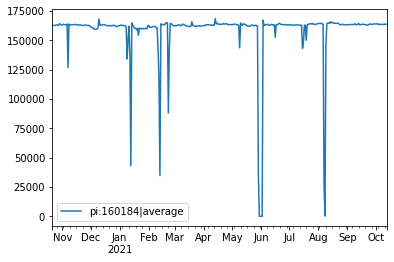

In [13]:
open Fable.Core
open Fable.Python

open CogniteSdk
open Os

let apiKey () = os.getenv "API_KEY"
let client = CogniteClient(clientName="Fable Python", project="publicdata", apiKey=apiKey().Value)

let ts = client.time_series.retrieve(id=7638223843994790L)
ts.plot("365d-ago", "now", [|"average"|], "1d")

# Use Case: Using Python Standard Library

- F# on Python environment without .NET
- We need type bindings: [Fable.Python](https://github.com/dbrattli/Fable.Python)
- Perhaps we want to automate the job using some tool 
- But tools produces code that is hard to use (friction)
- Hand-crafting and PR’s is needed!
- But this is not harder than what's lready done with e.g Python [typesched](https://github.com/python/typeshed)


In [14]:
open Fable.Python.Builtins

print($"test: {1+2}")

test: 3


In [16]:
open Fable.Python.Ast
let expr = ast.parse("lambda x: x + 42")
ast.unparse(expr)
print(ast.dump(expr))

Module(body=[Expr(value=Lambda(args=arguments(posonlyargs=[], args=[arg(arg='x')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=BinOp(left=Name(id='x', ctx=Load()), op=Add(), right=Constant(value=42))))], type_ignores=[])


In [17]:
open Fable.Python.Json
let record = {|A=10; B=20|}
json.dumps(record)

'{"A": 10, "B": 20}'

# Use Case: Flask Web Server

<img src="https://flask.palletsprojects.com/en/2.0.x/_images/flask-logo.png" style="float:right; margin:auto" width="200px">

- Web microframework. Think of it as simpler than Giraffe, more like Express for Node.
- **Challenge:** Python decorators. Can we use attributes? 

# Use Case: Time Flies Like an Arrow!

<img src="https://raw.githubusercontent.com/dbrattli/AsyncRx/main/logo/logo.png" style="float:right; margin:auto" width="200px">


- **Universal code**: What if we could re-use the same F# code for 
    - .NET, 
    - JavaScript 
    - ... and Python
    
- **Blast From the Past!** FableConf 2018 and Fable.Reaction
- **AsyncRx** – Inspired by AsyncRx from System.Reactive by Bart de Smet

> If we are careful, we can write universal code that runs anywhere. I.e lock free, ...


# Use Case: BBC micro:bit

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/Micropython-logo.svg" style="float:right; margin:auto" width="200px">

- Uses MicroPython 🙀
- **Challenge:** Flat file system
- **Challenge:** No Fable.Library, so we need a micro library replacement, and a bundler
- **Challenge:** This will be a MicroFSharp, but we can enable features like pattern matching etc

# Current Problems

- Optional F# arguments, i.e `?name: str` 
- Named Python arguments, aka keyword only arguments
- In Python you have positional (only) or keyword (only) arguments:

```txt
def f(pos1, pos2, /, pos_or_kwd, *, kwd1, kwd2):
      -----------    ----------     ----------
        |             |                  |
        |        Positional or keyword   |
        |                                - Keyword only
         -- Positional only
```

- This is currently not handled in Fable (only positional name-less arguments)
- PS: But this is something we want to have in F# as well, right?

# Final Remarks

- Fable Python is happening! 🎉
- Big thanks to Alfonso Garcia Caro and @ncave for Fable and for embraching this project 🤗
- **Alpha!** Not ready for production! ⚠️
- Still a long road ahead, but we made some progress 🚧
  
- Need help! 
    - Extending the Fable.Python type bindings
    - Documentation, code samples and tutorials
    - Expand Fable Python into Data Science

> Please try it!
https://github.com/dbrattli/Fable.Python

In [18]:
open Fable.Core

type IDisplay =
    [<Emit("display.Markdown($1)")>]
    abstract Markdown : data: string -> unit

[<Import("display", "IPython")>]
let display : IDisplay = nativeOnly

let yna = 
    "ynA" 
    |> Array.ofSeq 
    |> Array.rev 
    |> Array.map string 
    |> String.concat ""
    
display.Markdown $"""# {yna} {let a = "questions" in a}?"""

# Any questions?

In [19]:
%python

import math
import os
import ast
from fable_modules.fable_library.string import (
    to_console,
    printf,
    to_text,
    interpolate,
    join,
)
from cognite.client import CogniteClient
from fable_modules.fable_library.option import value as value_1
from fable_modules.fable_library.long import from_bits
from fable_modules.fable_library.array import map, reverse
from IPython import display

a = 10


def add(a_1, b, cont):
    return cont(a_1 + b)


def square(x, cont):
    return cont(x * x)


def sqrt(x, cont):
    return cont(math.sqrt(x))


def pythagoras(a_1, b, cont):
    state = 0

    def arrow_58(aa, a_1=a_1, b=b, cont=cont):
        def arrow_57(bb):
            def arrow_56(aabb):
                def arrow_55(result):
                    nonlocal state
                    to_console(printf("result: %A"))(result)
                    state = 42
                    return cont(result)

                return sqrt(aabb, arrow_55)

            return add(aa, bb, arrow_56)

        return square(b, arrow_57)

    return square(a_1, arrow_58)


q = 42


def handler(x):
    return to_text(interpolate("Got: %P()", [x]))


def api_key():
    return os.getenv("API_KEY")


client = CogniteClient(value_1(api_key()), None, "publicdata", "Fable Python")

ts = client.time_series.retrieve(from_bits(2465180838, 1778412, False))

expr = ast.parse("lambda x: x + 42")

record = {"A": 10, "B": 20}

yna = join("", map(lambda value: value, reverse(list(list("ynA"))), None))

display.Markdown((to_text(interpolate("# %P() %P()?", [yna, "questions"]))))